### Let's talk about customer's segmentation using machine learning!
#### What is customer segmentation?
##### It means grouping customers according to various characteristics.It is easier for organizations to understand their customers knowing with trends between customer groups,it's easier to make strategic decisions regarding product growth and marketing.The opportuniies to costumer segmentation are endless in that it totally depends on how much customer data you have

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### This dataset is made by the strategic team of the mall.The spending score is made by the mall to know how each customer spends.
##### From our dataset,we have ALL indepedent variables which means we dont know what to predict(No Target variable). This obviously makes it an unsupervised learning problem
##### Now,our main goal is to identify patterns within customers.We dont want to predict anything.To do this,we are going to use K-MEANS clustering algorithm which will make us to create a target variable which contains a finite number of values like 1,2,3,4....which means cluster numbers and assign customers to each clusters

In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.shape

(200, 5)

In [5]:
print('Number of Rows is',df.shape[0])
print('Number of Columns is',df.shape[1])

Number of Rows is 200
Number of Columns is 5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Kmeans Clustering
##### We are going to use only two columns for teaching learning purpose and to visualize clusters easily

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##### Create an instance of kmeans clustering with any variable and train our kmeans algoriyhm using fit method.

In [11]:
from sklearn.cluster import KMeans

In [12]:
k_means = KMeans()
k_means.fit(X)

KMeans()

#### Now,Let's us identify clusters by using fit_predict()
#### Please remember ,fit() only trains our algorithm but fit_predict() not only train algorithms BUT also create dependent variables(cluster) as shown below

In [13]:
k_means = KMeans()
k_means.fit_predict(X)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 7, 2, 7, 6, 7, 6, 7,
       2, 7, 6, 7, 6, 7, 6, 7, 6, 7, 2, 7, 6, 7, 2, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 7, 6, 7, 2, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 7, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4])

##### As shown above,our kmeans clustering algorithm gives us 8 clusters(0-7).But we can set it to any value using n_cluster=optimal number

##### To avoid trial and error,we can use Elbow Method To Find The Optimal Number Of Clusters.So,Let's go!
##### We are going to run this kmeans algorithm with several number of clusters starting with 1,then 2 ...up to 10 clusters. Anytime we run this Kmeans algorithm with several number of clusters,it computes (WCSS).We are going to store this WCSS into python list(using for loops to run kmeans clustering 10 times and we assign it to variable k_means) and then we will visualize with WCSS.The calculated WCSS values are available into one attribute of kmeans clustering algorithm INERTIA_

In [14]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\DAMMY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37271.88623658948,
 30273.394312070028,
 25062.433792653766,
 21809.92756261518,
 19755.619860833398]

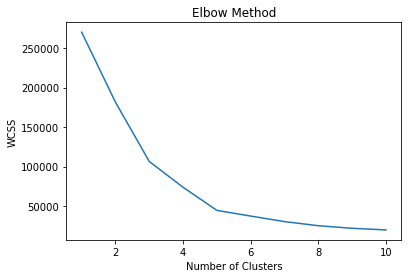

In [16]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

##### From our elbow graph,graph was decreasing rapidly till it gets to 5 and it starts to decrease slowly.We can consider 5 to be the optimal or elbow point because graph.So we can agree to use 5 as our optimal number of clusters

#### Model Training
##### We are going to train our KMeans clustering algorithm with optimal number of clusters 5

In [17]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [18]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

##### Now,our customers are divided into 5 clusters 0-4.So these 5 clusters contain different groups of customers which means similar customers are in the same group.For example,customer with ID-1 belongs to cluster-2,customer with ID-2 belongs to cluster-3,customer with ID-3 belongs to cluster-2 and so on.So let's visualize these clusters

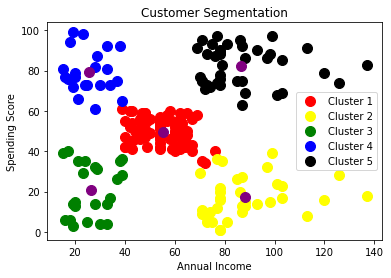

In [19]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label='Cluster 2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='blue',label='Cluster 4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='black',label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='purple')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

##### Explaining the visuals:
##### Cluster1=Customers with medium annual income and medium annual spending
##### Cluster2=Customers with high annual income but low annual spending
##### Cluster3=Customers with low annual income and low annual spending
##### Cluster4=Customers with low annual income but high annual spending
##### Cluster5=Customers with high annual income and high annual spending

##### Strategic team can now decide for which product we have to target which customers.So,this is a good way for organizations to understand their customers.Knowing the difference between customer groups,it's easier to make strategic decisions regarding product growth and marketing

#### Now,let's perform prediction

In [20]:
k_means.predict([[50,13]])

array([2])

#### Save The Model
##### Training isn't required to save models

In [21]:
import joblib

In [22]:
joblib.dump(k_means,'customer_segmentation')

['customer_segmentation']

In [23]:
model = joblib.load('customer_segmentation')

In [24]:
model.predict([[12,40]])

array([2])

In [25]:
from tkinter import*
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
   
    model = joblib.load('customer_segmentation')
    result=model.predict([[p1,p2]])
    print("This Customer Belongs to cluster no:",result[0])
    
    if result[0]==0:
        Label(master,text="Customers with medium annual income and medium annual spending").grid(row=31)
    elif result[0]==1:
        Label(master,text="Customers with high annual income but low annual spending").grid(row=31)
    elif result[0]==2:
        Label(master,text="Customers with low annual income and low annual spending").grid(row=31)
    elif result[0]==3:
        Label(master,text="Customers with low annual income but high annual spending").grid(row=31)
    elif result[0]==4:
        Label(master,text="Customers with high annual income and high annual spending").grid(row=31)
master=Tk()
master.title("My Customer Segmentation Using Machine Learning")

label = Label(master,text="Heart Disease Prediction System"
                         ,bg = "black",fg="white").\
                             grid(row=0,columnspan=2)


Label(master,text="Annual Income").grid(row=1)
Label(master,text="Spending Score").grid(row=2)



e1=Entry(master)
e2=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text="Predict",command=show_entry_fields).grid()


mainloop()


This Customer Belongs to cluster no: 2
